<a href="https://colab.research.google.com/github/Asif-PA/Health-Insurance-Project/blob/main/Health_Insurance_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Read the dataset (tab, csv, xlsx, txt, inbuilt dataset)**

In [ ]:
df=pd.read_csv("/content/healthinsurance.csv")

In [ ]:
df.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


. **Summarize important observations from the data set (5 MARKS)**

What are the number of rows and number of columns & types of variables.

Check statistical summary of all the variables

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13648 entries, 0 to 13647
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  13648 non-null  int64  
 1   sex                  13648 non-null  object 
 2   weight               13648 non-null  int64  
 3   bmi                  13648 non-null  float64
 4   hereditary_diseases  13648 non-null  object 
 5   no_of_dependents     13648 non-null  int64  
 6   smoker               13648 non-null  int64  
 7   city                 13648 non-null  object 
 8   bloodpressure        13648 non-null  int64  
 9   diabetes             13648 non-null  int64  
 10  regular_ex           13648 non-null  int64  
 11  job_title            13648 non-null  object 
 12  claim                13648 non-null  float64
dtypes: float64(2), int64(7), object(4)
memory usage: 1.4+ MB


**all the columns aare in proper format and datatype**

In [ ]:
df.shape

(13648, 13)

**There are 13648 rows and 13 columns**

In [ ]:
df.columns

Index(['age', 'sex', 'weight', 'bmi', 'hereditary_diseases',
       'no_of_dependents', 'smoker', 'city', 'bloodpressure', 'diabetes',
       'regular_ex', 'job_title', 'claim'],
      dtype='object')

In [ ]:
numerical_data=df.select_dtypes(include=np.number)
categorical_data=df.select_dtypes(exclude=np.number)

In [ ]:
numerical_data.shape

(13648, 9)

In [ ]:
categorical_data.shape

(13648, 4)

**There are 8 independent numericas features and 1 target variable which is obiviously numerical. Also there are 4 categorical variables**

**Even though inetger value regular_ex,diabetes,smoker,no_fo dependents are binary and cannot be considered pure numerical**

In [ ]:
df.describe()

,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim
count,13648.000000,13648.000000,13648.000000,13648.000000,13648.000000,13648.000000,13648.000000,13648.000000,13648.000000
mean,39.586533,64.689478,30.287295,1.106462,0.198124,68.628737,0.783118,0.223110,13416.465050
std,14.040870,13.655520,6.133622,1.209568,0.398601,19.443669,0.412136,0.416347,12080.022325
min,18.000000,34.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.900000
25%,27.000000,54.000000,25.700000,0.000000,0.000000,64.000000,1.000000,0.000000,4889.000000
50%,40.000000,63.000000,29.400000,1.000000,0.000000,72.000000,1.000000,0.000000,9715.800000
75%,52.000000,75.000000,34.400000,2.000000,0.000000,80.000000,1.000000,0.000000,16450.900000
max,64.000000,95.000000,53.100000,5.000000,1.000000,122.000000,1.000000,1.000000,63770.400000


**Smokers and Claim Amounts: Approximately 20% of policyholders are smokers, which could be a significant factor influencing higher claim amounts due to smoking-related health risks.**

**Diabetes and Health Costs: With around 78% of policyholders being diabetic, diabetes appears to be a prevalent condition in the dataset and may play a critical role in driving up insurance claim costs.**

Analyse relationships among variables (10 MARKS)

Plot correlation matrix. Which are the variables most correlated with Target?

Do you want to exclude some variables from the model based on this analysis? What other actions will you take?

Any multicollinearity visible from the correlation matrix?

Perform univariate and multivariate EDA on all the features/target and state any interesting insights relevant to the regression model?

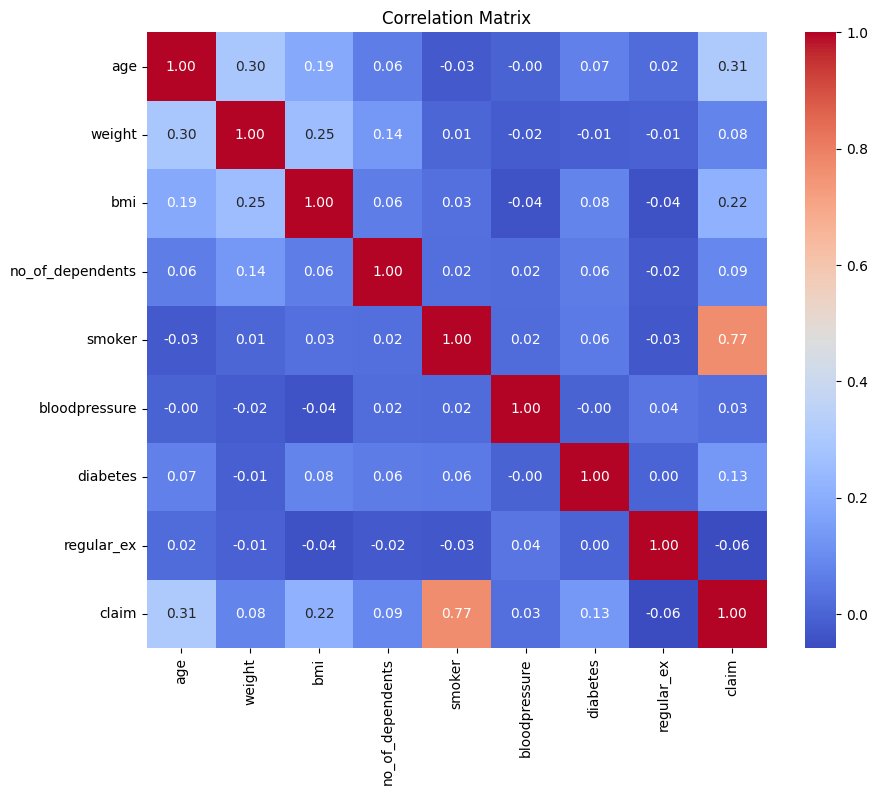

In [ ]:
corr_matrix = numerical_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
correlation_matrix = numerical_data.corr()
print(correlation_matrix)

                       age    weight       bmi  no_of_dependents    smoker  \
age               1.000000  0.295290  0.188336          0.061719 -0.025360   
weight            0.295290  1.000000  0.252688          0.135207  0.006726   
bmi               0.188336  0.252688  1.000000          0.063387  0.031759   
no_of_dependents  0.061719  0.135207  0.063387          1.000000  0.024792   
smoker           -0.025360  0.006726  0.031759          0.024792  1.000000   
bloodpressure    -0.002845 -0.019850 -0.038534          0.020210  0.018369   
diabetes          0.069989 -0.011837  0.080752          0.059550  0.055064   
regular_ex        0.016245 -0.008306 -0.042158         -0.024471 -0.031477   
claim             0.305875  0.078866  0.215153          0.086601  0.766487   

                  bloodpressure  diabetes  regular_ex     claim  
age                   -0.002845  0.069989    0.016245  0.305875  
weight                -0.019850 -0.011837   -0.008306  0.078866  
bmi                  

In [ ]:
# Calculating correlation of numerical variables with 'claim'
correlation_with_target = numerical_data.corr()['claim'].sort_values(ascending=False)
print(correlation_with_target)

claim               1.000000
smoker              0.766487
age                 0.305875
bmi                 0.215153
diabetes            0.131717
no_of_dependents    0.086601
weight              0.078866
bloodpressure       0.025741
regular_ex         -0.058537
Name: claim, dtype: float64


**Strongest Predictor:**The most significant predictor of claims is smoker with a correlation of 0.766, followed by age.

**Weak Predictors:** Variables like no_of_dependents, weight, and bloodpressure have very weak or negligible correlations with the target.

**weight:**Correlation with claim: 0.078 (very weak positive correlation).

Reason: weight and bmi are likely related because BMI is calculated using weight and height. Since BMI already captures the information about body weight in a more standardized way, keeping both weight and bmi might lead to multicollinearity. Removing weight can help reduce redundancy and focus on bmi, which is more informative for health-related costs.

**no_of_dependents:** Correlation with claim: 0.087 (very weak positive correlation).

 The number of dependents has little to no impact on the claim amount in this dataset. While dependents can be a factor in health insurance pricing, in this case, it doesn't appear to significantly impact claim amounts, so this feature could be removed.



**For the time being i am keeping all the fetures keeping in mind with the observations from the correlation**

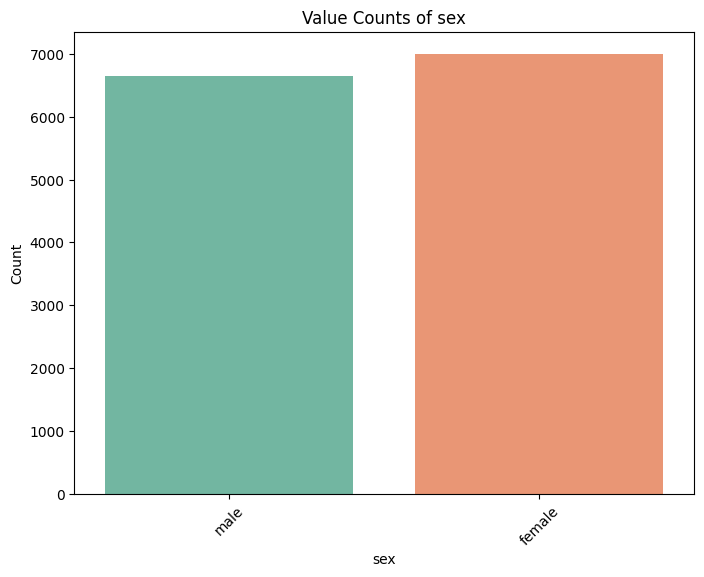

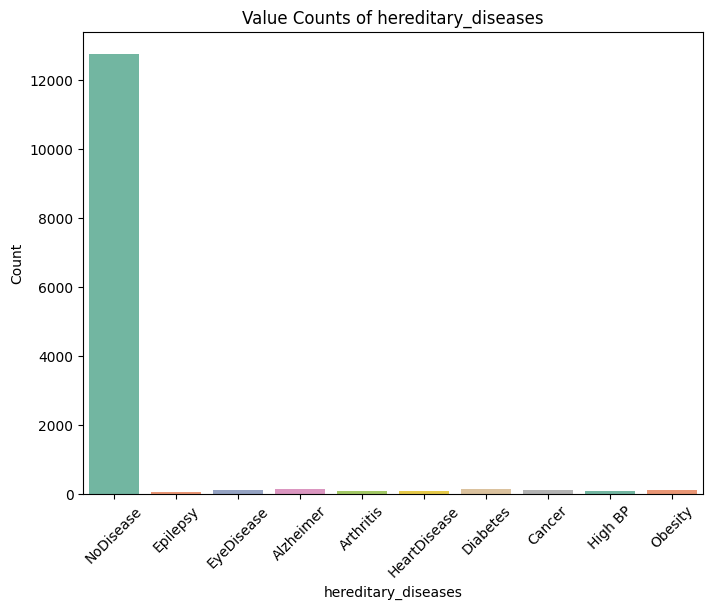

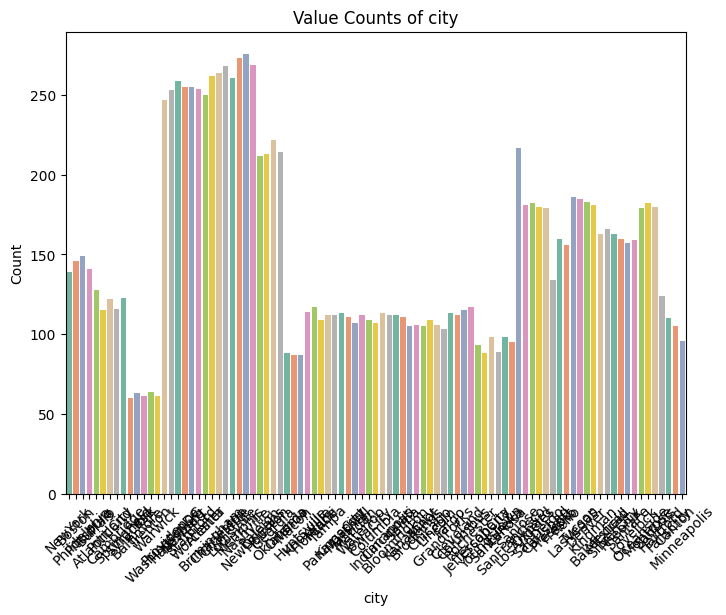

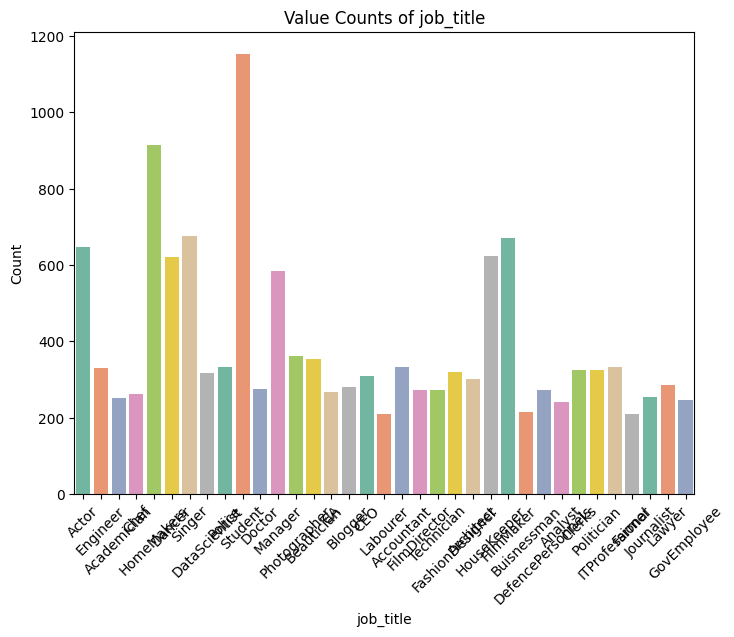

In [ ]:
# Listing all the categorical variables
categorical_columns = categorical_data.columns

# Creating a countplot for each categorical variable
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column, palette='Set2')
    plt.title(f'Value Counts of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
df['hereditary_diseases'].value_counts()

,count
hereditary_diseases,
NoDisease,12761
Alzheimer,134
Diabetes,127
EyeDisease,121
Obesity,108
Cancer,96
HeartDisease,93
Arthritis,79
High BP,69


In [ ]:
df['job_title'].value_counts()

,count
job_title,
Student,1153
HomeMakers,916
Singer,677
FilmMaker,670
Actor,648
HouseKeeper,625
Dancer,621
Manager,585
Photographer,362


In [ ]:
df['city'].value_counts()

,count
city,
Nashville,276
Memphis,273
NewOrleans,269
Charlotte,268
Charleston,264
...,...
Trenton,64
Baltimore,63
Warwick,61


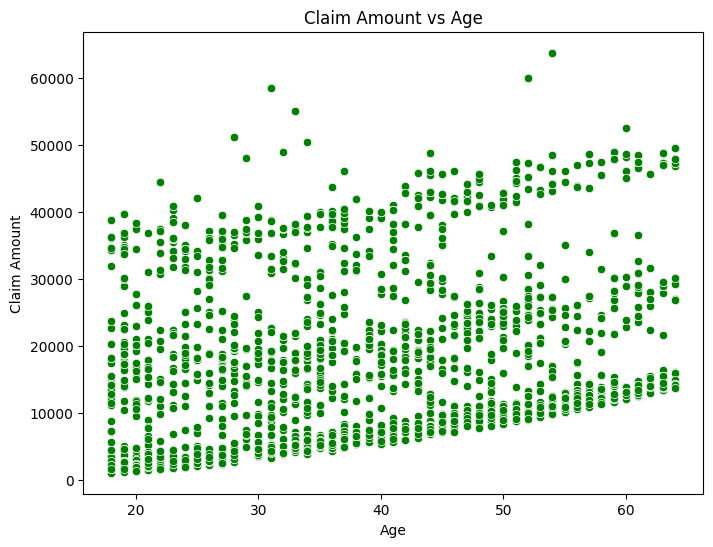

In [ ]:
# Scatter plot of claim vs age
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='claim', data=df, color='green')
plt.title('Claim Amount vs Age')
plt.xlabel('Age')
plt.ylabel('Claim Amount')
plt.show()


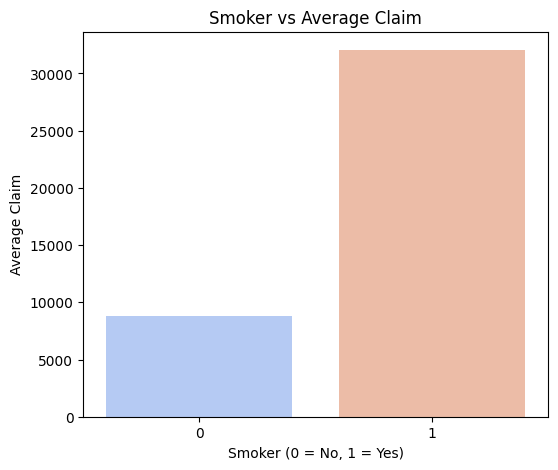

In [ ]:
# Calculating the mean claim for each smoker category
claim_smoker = df.groupby('smoker')['claim'].mean().reset_index()

#  bar plot
plt.figure(figsize=(6, 5))
sns.barplot(x='smoker', y='claim', data=claim_smoker, palette='coolwarm')
plt.title('Smoker vs Average Claim')
plt.xlabel('Smoker (0 = No, 1 = Yes)')
plt.ylabel('Average Claim')
plt.show()


**Average claim of Smoker is very high compared to the non smoker**

**Check for defects in the data. Perform necessary actions to 'fix' these defects {15 MARKS)**

Is the target variable normally distributed? If not, what should you do ?

Check distribution of other features

Any variables wrongly identified in Python? If yes, correct the data types

Do variables have missing/null values?

Does the data have outliers?

Based on your observations what transformation of features or creation of additional features would you do?

Are there categorical features and if yes how do you handle them ?

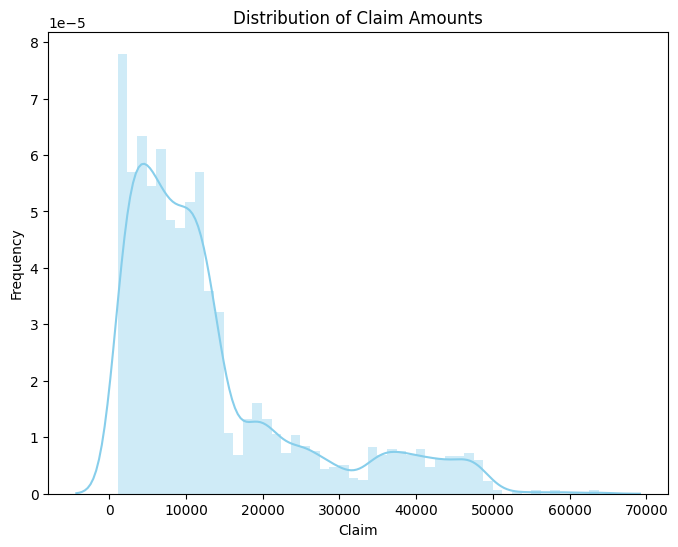

In [ ]:
# Plotting the distribution of 'claim'
plt.figure(figsize=(8, 6))
sns.distplot(df['claim'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Claim Amounts')
plt.xlabel('Claim')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='claim', ylabel='Density'>

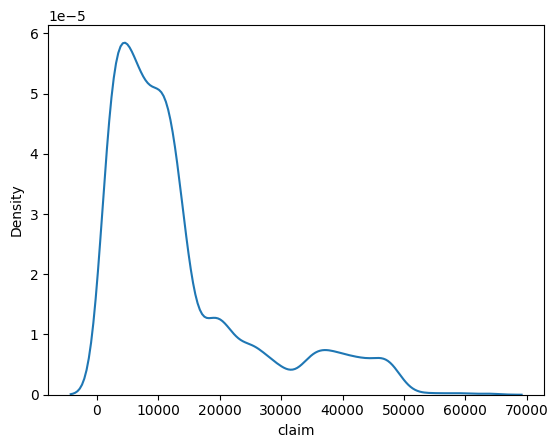

In [ ]:
sns.kdeplot(df['claim'])

**Target Variable is highly skewwd , so doing logarithemic trasnformation would be good**

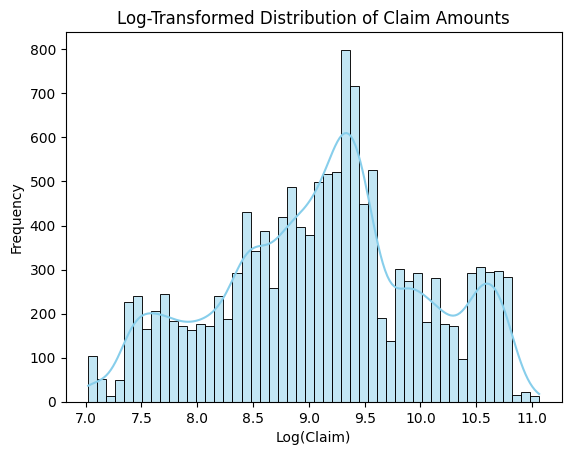

In [ ]:
# Log transformation
df['claim_log'] = np.log1p(df['claim'])

# Checking distribution of transformed data
sns.histplot(df['claim_log'], bins=50, kde=True, color='skyblue')
plt.title('Log-Transformed Distribution of Claim Amounts')
plt.xlabel('Log(Claim)')
plt.ylabel('Frequency')
plt.show()

**After Log transformation the tarhet variable is better normlly distrubuted**

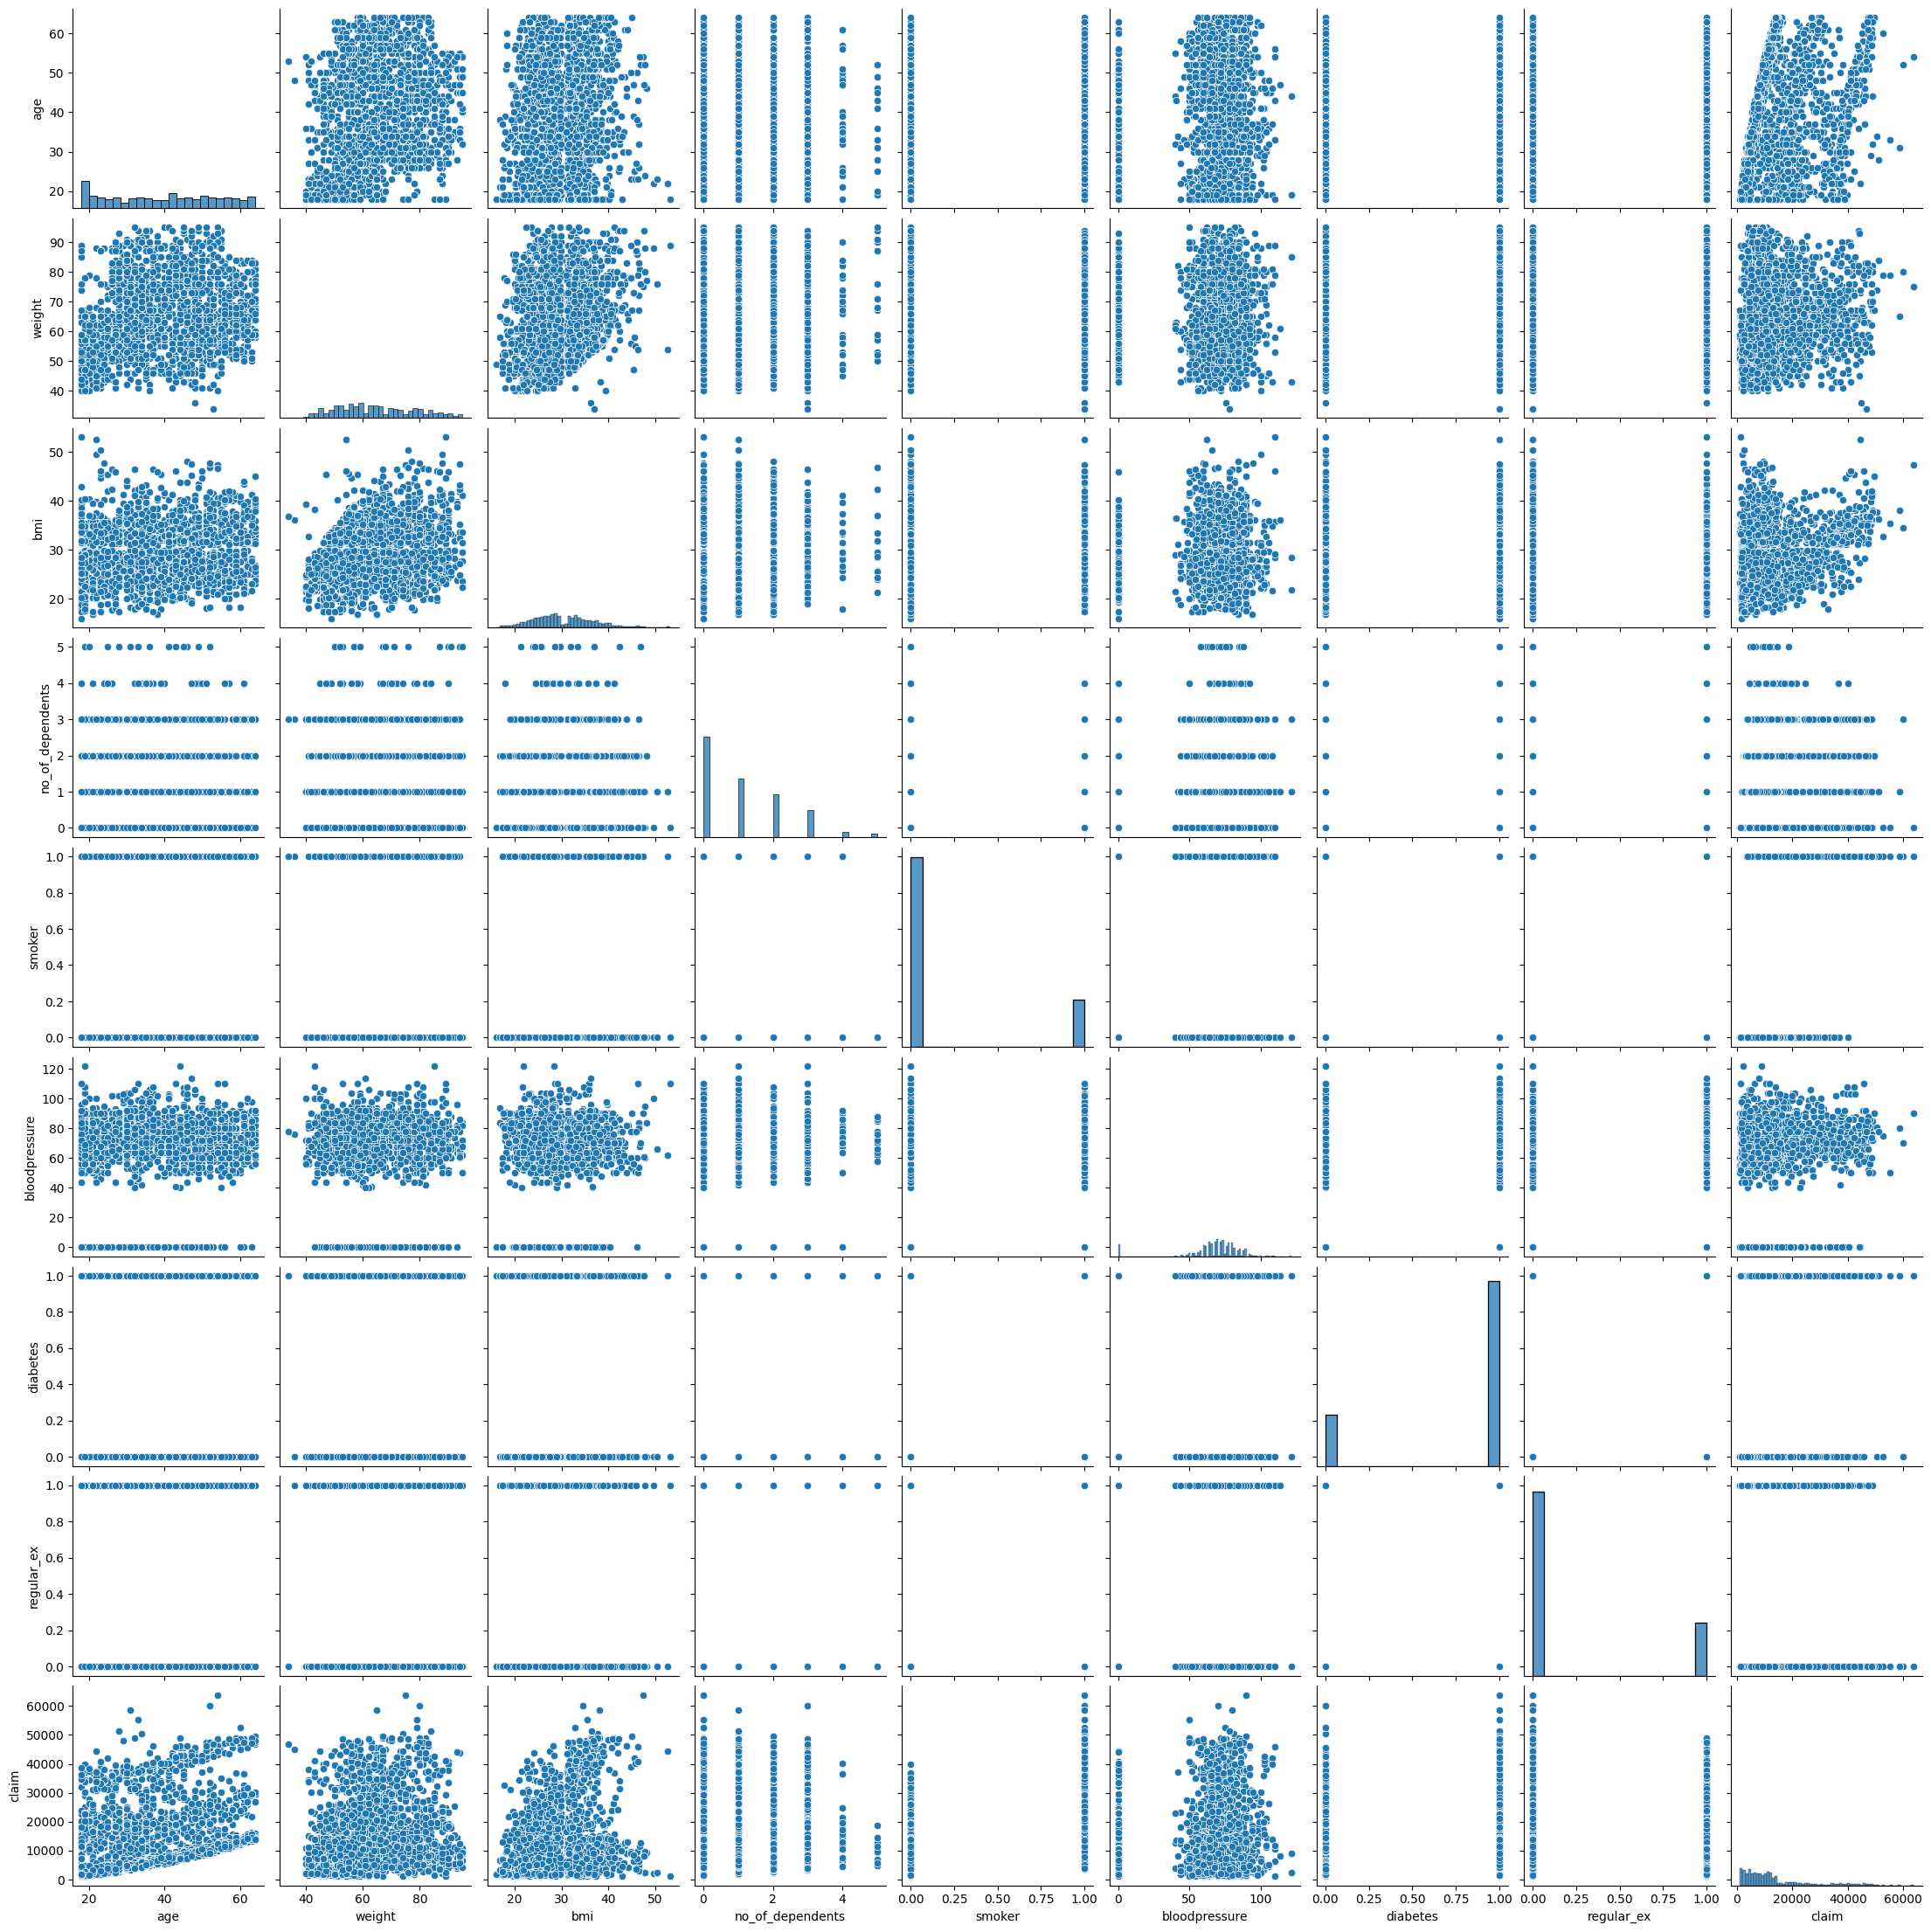

In [ ]:
sns.pairplot(numerical_data)

In [ ]:
# List of columns to check for outliers
columns_to_check = ['age', 'claim', 'bloodpressure', 'bmi', 'weight']

In [ ]:
for col in columns_to_check:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    # Calculating IQR
    IQR = Q3 - Q1
    # Calculatimg the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"Outliers in {col}:")
    print(outliers[[col]], "\n")

Outliers in age:
Empty DataFrame
Columns: [age]
Index: [] 

Outliers in claim:
         claim
3      48517.6
9      44400.4
26     41949.2
71     34166.3
89     39556.5
...        ...
13590  40103.9
13591  38344.6
13619  35908.7
13631  40419.0
13638  42124.5

[1496 rows x 1 columns] 

Outliers in bloodpressure:
       bloodpressure
9                  0
11                 0
14                 0
23                 0
44                 0
...              ...
13513              0
13515              0
13563            106
13589              0
13642              0

[811 rows x 1 columns] 

Outliers in bmi:
        bmi
180    47.8
349    52.6
451    47.5
1347   52.6
1509   50.4
...     ...
13400  50.4
13458  52.6
13475  50.4
13547  47.7
13635  47.5

[61 rows x 1 columns] 

Outliers in weight:
Empty DataFrame
Columns: [weight]
Index: [] 



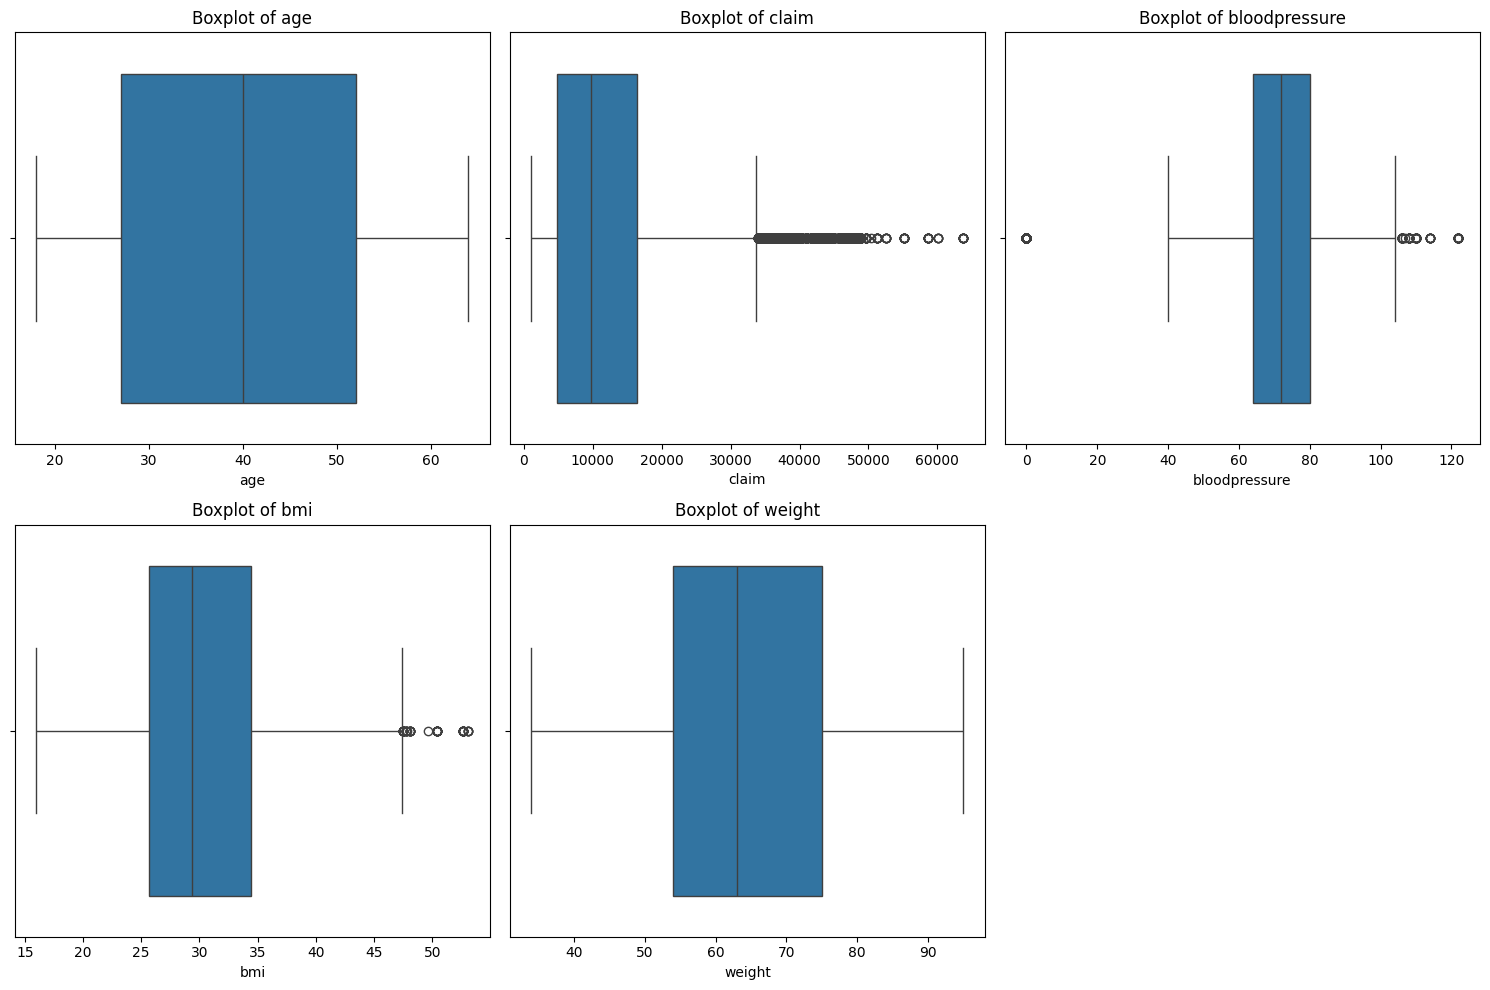

In [ ]:
columns_to_plot = ['age', 'claim', 'bloodpressure', 'bmi', 'weight']
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

**we will remove data having blood pressure zero**

In [ ]:
zero_bloodpressure_count = df[df['bloodpressure'] == 0].shape[0]
print(f"Number of rows with bloodpressure = 0: {zero_bloodpressure_count}")
# Remove rows where bloodpressure is zero
df= df[df['bloodpressure'] != 0]
# Verify if the rows were removed
print(f"Data shape after removing zero bloodpressure: {df.shape}")

Number of rows with bloodpressure = 0: 690
Data shape after removing zero bloodpressure: (12958, 14)


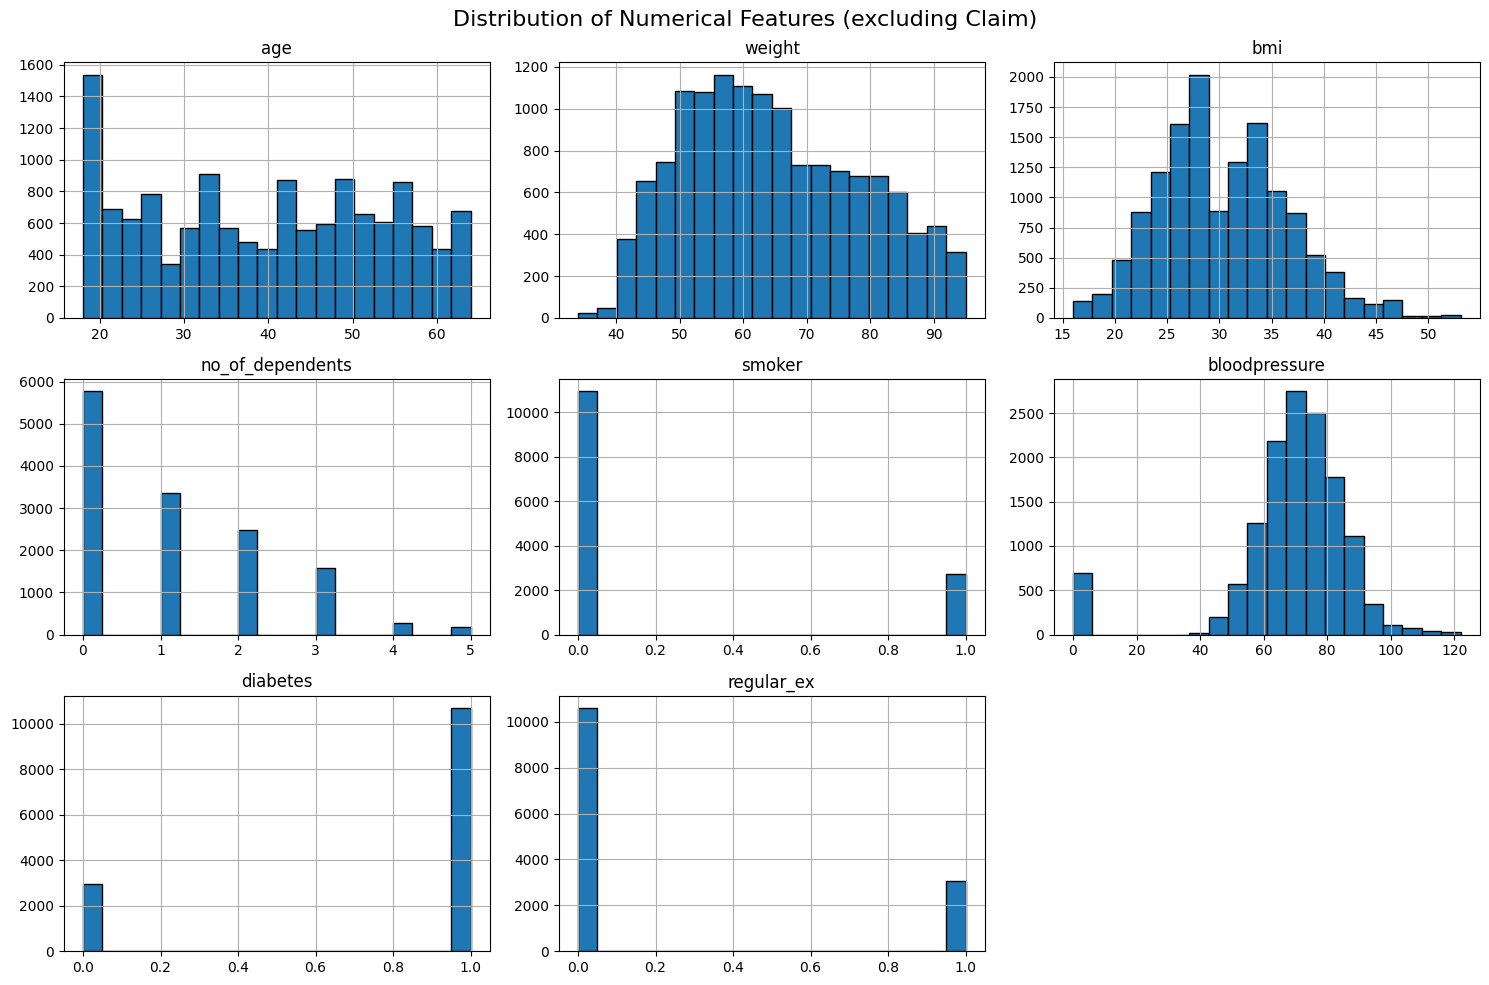

In [ ]:
# numerical columns excluding the 'claim' column
numerical_data_excluding_claim = numerical_data.drop(columns=['claim'])
#  histograms for each numerical feature
numerical_data_excluding_claim.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribution of Numerical Features (excluding Claim)', fontsize=16)
plt.tight_layout()
plt.show()

**Even though inetger value regular_ex,diabetes,smoker,no_fo dependents are binary and cannot be considered pure numerical**

In [ ]:
from sklearn.preprocessing import PowerTransformer

# columns to apply the power transformer
columns_to_transform = ['age', 'bmi', 'weight', 'bloodpressure']
scaler = PowerTransformer()

# Apply the transformer on the selected columns and update the dataframe
df[columns_to_transform] = scaler.fit_transform(df[columns_to_transform])

print(df[columns_to_transform].head())


        age       bmi    weight  bloodpressure
0  1.391139 -0.977695  0.050539       0.019690
1  0.697654 -1.316663  0.810251       0.527491
2 -0.483686 -2.395379  0.050539       1.328050
3  1.452060  1.008771 -0.834595       0.019690
4 -1.531104 -1.742054 -1.104072       0.854146


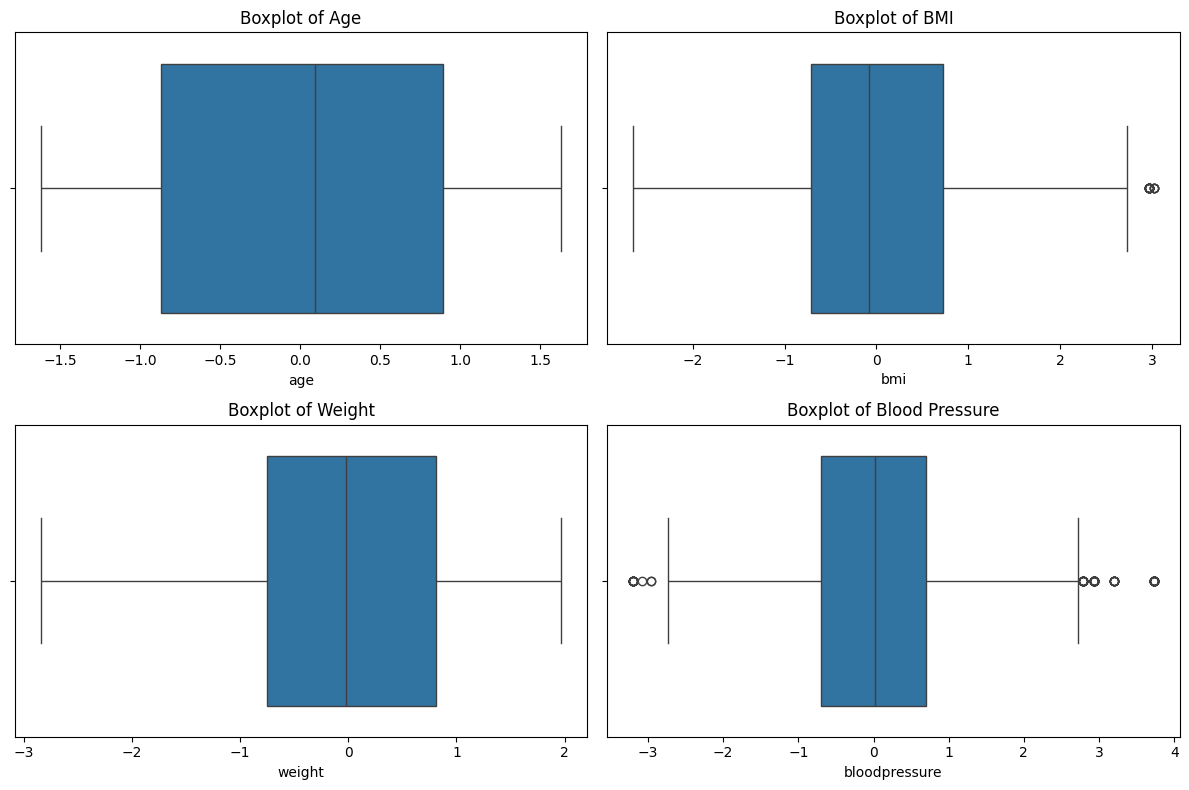

In [ ]:

# Creating a boxplot for the transformed columns
plt.figure(figsize=(12, 8))

# Plot for age
plt.subplot(2, 2, 1)
sns.boxplot(x=df['age'])
plt.title('Boxplot of Age')

# Plot for bmi
plt.subplot(2, 2, 2)
sns.boxplot(x=df['bmi'])
plt.title('Boxplot of BMI')

# Plot for weight
plt.subplot(2, 2, 3)
sns.boxplot(x=df['weight'])
plt.title('Boxplot of Weight')

# Plot for bloodpressure
plt.subplot(2, 2, 4)
sns.boxplot(x=df['bloodpressure'])
plt.title('Boxplot of Blood Pressure')

plt.tight_layout()
plt.show()


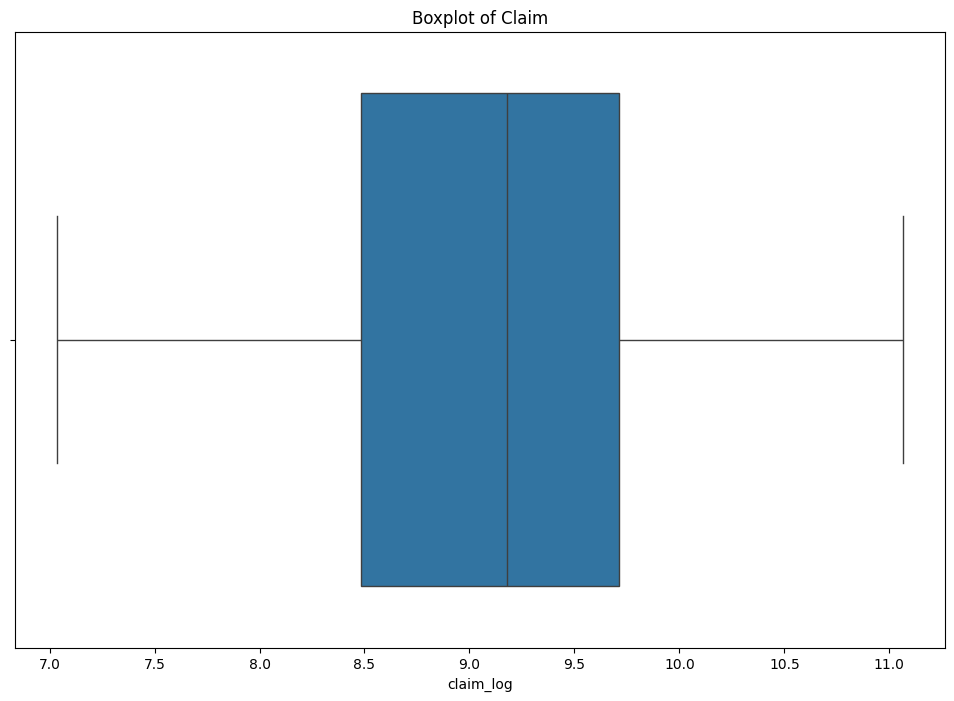

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df['claim_log'])
plt.title('Boxplot of Claim')
plt.show()

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
weight,0
bmi,0
hereditary_diseases,0
no_of_dependents,0
smoker,0
city,0
bloodpressure,0
diabetes,0


**There are no missing values**

In [ ]:
df.columns

Index(['age', 'sex', 'weight', 'bmi', 'hereditary_diseases',
       'no_of_dependents', 'smoker', 'city', 'bloodpressure', 'diabetes',
       'regular_ex', 'job_title', 'claim', 'claim_log'],
      dtype='object')

In [ ]:
df1=df.copy()

In [ ]:
df['job_title'].value_counts()

,count
job_title,
Student,1115
HomeMakers,899
FilmMaker,654
Singer,637
HouseKeeper,611
Dancer,606
Actor,593
Manager,567
Accountant,333


In [ ]:
df['city'].value_counts()

,count
city,
Nashville,268
NewOrleans,259
Memphis,257
Charlotte,256
Louisville,250
...,...
Warwick,59
Trenton,58
Baltimore,58


In [ ]:
df['hereditary_diseases'].value_counts()

,count
hereditary_diseases,
NoDisease,12108
Alzheimer,134
Diabetes,127
EyeDisease,107
Obesity,101
HeartDisease,93
Cancer,90
Arthritis,69
High BP,69


for the time being am dropping city has it having a lot of unique value sand encodding both job title and heridtary disease

In [ ]:
df.columns

Index(['age', 'sex', 'weight', 'bmi', 'hereditary_diseases',
       'no_of_dependents', 'smoker', 'city', 'bloodpressure', 'diabetes',
       'regular_ex', 'job_title', 'claim', 'claim_log'],
      dtype='object')

In [ ]:
#drop claim
df.drop(['claim'],axis=1,inplace=True)

In [ ]:
df.columns

Index(['age', 'sex', 'weight', 'bmi', 'hereditary_diseases',
       'no_of_dependents', 'smoker', 'city', 'bloodpressure', 'diabetes',
       'regular_ex', 'job_title', 'claim_log'],
      dtype='object')

In [ ]:
X=df.drop(['claim_log'],axis=1)


In [ ]:
y=df['claim_log']

In [ ]:
X.columns

Index(['age', 'sex', 'weight', 'bmi', 'hereditary_diseases',
       'no_of_dependents', 'smoker', 'city', 'bloodpressure', 'diabetes',
       'regular_ex', 'job_title'],
      dtype='object')

In [ ]:
X.drop(['city'],axis=1,inplace=True)

In [ ]:
# Identify categorical columns for encoding
categorical_columns = ['job_title', 'hereditary_diseases','sex']

# Separate the categorical columns from X
X_categorical = X[categorical_columns]

# Applying  pd.get_dummies() to these categorical columns (without the first category to avoid dummy trap)
X_categorical_encoded = pd.get_dummies(X_categorical, drop_first=True,dtype='int')

# Remove the categorical columns from X
X = X.drop(columns=categorical_columns)

# Concatenate the encoded categorical columns back with the rest of X
X_final = pd.concat([X, X_categorical_encoded], axis=1)
X_final.head()

,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,job_title_Accountant,job_title_Actor,...,hereditary_diseases_Arthritis,hereditary_diseases_Cancer,hereditary_diseases_Diabetes,hereditary_diseases_Epilepsy,hereditary_diseases_EyeDisease,hereditary_diseases_HeartDisease,hereditary_diseases_High BP,hereditary_diseases_NoDisease,hereditary_diseases_Obesity,sex_male
0,1.391139,0.050539,-0.977695,1,0,0.019690,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,0.697654,0.810251,-1.316663,1,0,0.527491,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.483686,0.050539,-2.395379,2,1,1.328050,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1.452060,-0.834595,1.008771,1,1,0.019690,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-1.531104,-1.104072,-1.742054,0,0,0.854146,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
X_final.columns

Index(['age', 'weight', 'bmi', 'no_of_dependents', 'smoker', 'bloodpressure',
       'diabetes', 'regular_ex', 'job_title_Accountant', 'job_title_Actor',
       'job_title_Analyst', 'job_title_Architect', 'job_title_Beautician',
       'job_title_Blogger', 'job_title_Buisnessman', 'job_title_CA',
       'job_title_CEO', 'job_title_Chef', 'job_title_Clerks',
       'job_title_Dancer', 'job_title_DataScientist',
       'job_title_DefencePersonnels', 'job_title_Doctor', 'job_title_Engineer',
       'job_title_Farmer', 'job_title_FashionDesigner',
       'job_title_FilmDirector', 'job_title_FilmMaker',
       'job_title_GovEmployee', 'job_title_HomeMakers',
       'job_title_HouseKeeper', 'job_title_ITProfessional',
       'job_title_Journalist', 'job_title_Labourer', 'job_title_Lawyer',
       'job_title_Manager', 'job_title_Photographer', 'job_title_Police',
       'job_title_Politician', 'job_title_Singer', 'job_title_Student',
       'job_title_Technician', 'hereditary_diseases_Arthrit

**Split dataset into train and test (70:30) (5 MARKS)**

Are both train and test representative of the overall data? How would you check ?

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

. Fit a base model.
Please write your key observations (15 MARKS)

What is the overall R2? Please comment on whether it is good or not.

Do the prediction using test data.

Which variables are significant?

Is there multi-collinearity?

. How do you improve the accuracy of the model? Write clearly the changes that you will make before re -fitting the model. Fit the final model. (20 MARKS)

Please feel free to have any number of iterations to get to the final answer.
 Marks are awarded based on the quality of final model you are able to achieve.
Remove insignificant features and rebuild model

Remove correlated features identified using VIF and rebuild model

Use feature selection and polynomial features and rebuild model

Any other methods used will also be appreciated and considered

Write detailed observations what and how you achieved it

In [ ]:
import statsmodels.api as sm

# Add a constant term to the independent variables (for intercept)
X_train_with_const = sm.add_constant(X_train)

# Fit the base model (OLS regression)
MLR_model_full = sm.OLS(y_train, X_train_with_const).fit()

# Display the summary
print(MLR_model_full.summary())

# Make predictions on the test set
X_test_with_const = sm.add_constant(X_test)
y_pred_base_model = MLR_model_full.predict(X_test_with_const)

# Evaluate predictions using R-squared
from sklearn.metrics import  r2_score

r2_base_model = r2_score(y_test, y_pred_base_model)

print(f" R²: {r2_base_model}")


                            OLS Regression Results                            
Dep. Variable:              claim_log   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     554.3
Date:                Sun, 19 Jan 2025   Prob (F-statistic):               0.00
Time:                        09:27:08   Log-Likelihood:                -5575.7
No. Observations:                9070   AIC:                         1.126e+04
Df Residuals:                    9017   BIC:                         1.163e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

**P-values:**

**P-values < 0.05: Features such as age, bmi, smoker, diabetes, hereditary_diseases_* are highly statistically significant, with p-values much lower than 0.05.**

**P-values > 0.05: Features such as regular_ex, job_title_*, and bloodpressure show p-values above 0.05, suggesting that they are not statistically significant predictors for the target variable in this model.**

**Non-significant Variables (p-value > 0.05):**

regular_ex: p-value = 0.179 (not significant)

job_title_Accountant: p-value = 0.796 (not significant)

job_title_Actor: p-value = 0.333 (not significant)

job_title_Analyst: p-value = 0.027 (marginally significant)

job_title_Architect: p-value = 0.120 (not significant)

job_title_Beautician: p-value = 0.526 (not significant)

job_title_Buisnessman: p-value = 0.374 (not significant)

job_title_CA: p-value = 0.144 (not significant)

job_title_CEO: p-value = 0.701 (not significant)

job_title_Clerks: p-value = 0.179 (not significant)

job_title_Dancer: p-value = 0.870 (not significant)

job_title_DataScientist: p-value = 0.137 (not significant)

job_title_DefencePersonnels: p-value = 0.035 (marginally significant)

job_title_Doctor: p-value = 0.111 (not significant)

job_title_Engineer: p-value = 0.085 (marginally significant)

job_title_Farmer: p-value = 0.221 (not significant)

job_title_FashionDesigner: p-value = 0.830 (not significant)

job_title_FilmDirector: p-value = 0.235 (not significant)

job_title_FilmMaker: p-value = 0.633 (not significant)

job_title_GovEmployee: p-value = 0.390 (not significant)

job_title_HomeMakers: p-value = 0.246 (not significant)

job_title_HouseKeeper: p-value = 0.133 (not significant)

job_title_ITProfessional: p-value = 0.028 (significant)

job_title_Journalist: p-value = 0.623 (not significant)

job_title_Labourer: p-value = 0.609 (not significant)

job_title_Lawyer: p-value = 0.878 (not significant)

job_title_Manager: p-value = 0.577 (not significant)

job_title_Photographer: p-value = 0.005 (significant)

job_title_Police: p-value = 0.349 (not significant)

job_title_Politician: p-value = 0.080 (marginally significant)

job_title_Singer: p-value = 0.051 (marginally significant)

job_title_Student: p-value = 0.103 (not significant)

**Multicollinearity:**

**The condition number (98.6) is not extremely high, which suggests that multicollinearity is not a major issue in this model, but further checks could be done to confirm.**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["features"] = X_train.columns
vif_data["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Display the VIF values
print(vif_data)

                            features  VIF Factor
0                                age    1.317595
1                             weight    1.307909
2                                bmi    1.187263
3                   no_of_dependents    1.951137
4                             smoker    1.657399
5                      bloodpressure    1.057523
6                           diabetes    4.770329
7                         regular_ex    1.347881
8               job_title_Accountant    2.046817
9                    job_title_Actor    2.810992
10                 job_title_Analyst    1.726558
11               job_title_Architect    1.944959
12              job_title_Beautician    1.938347
13                 job_title_Blogger    1.827630
14             job_title_Buisnessman    1.629579
15                      job_title_CA    1.703453
16                     job_title_CEO    1.728850
17                    job_title_Chef    1.768939
18                  job_title_Clerks    1.868673
19                  

**Baed on VIF our features dont have much multicolinearity**

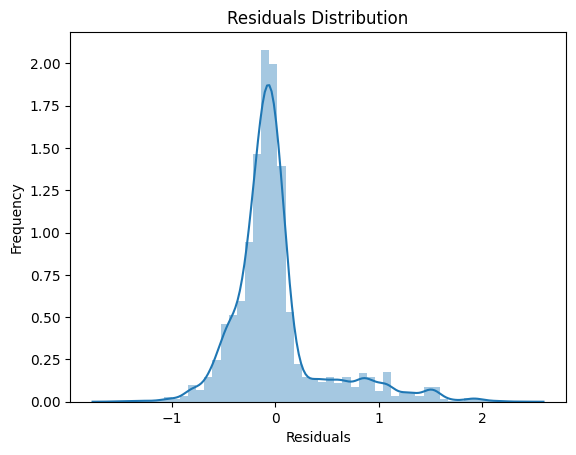

Shapiro-Wilk Test Statistic: 0.8445441680003345
P-Value: 3.93710834683651e-69
Since the p-value is less than 5%, the residuals do not follow a normal distribution.


In [ ]:
from scipy.stats import shapiro

# Plotting the residuals
sns.distplot(MLR_model_full.resid)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Shapiro-Wilk test for normality
stat, p_value = shapiro(MLR_model_full.resid)

# Print the test statistic and corresponding p-value
print(f'Shapiro-Wilk Test Statistic: {stat}')
print(f'P-Value: {p_value}')

# Interpreting the results
if p_value > 0.05:
    print("Since the p-value is more than 5%, we can say that the residuals are following a normal distribution.")
else:
    print("Since the p-value is less than 5%, the residuals do not follow a normal distribution.")

**Residualas are not follwong perfect normal distrubution here**

**Linear Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(X_train, y_train)

# Predict on the test data
y_pred = lr_model.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# Print the R-squared score
print(f'R-squared score: {r2}')


R-squared score: 0.7582271129662422


**Removing Insignifcant Variables and fitting the OLS and Lr Model**

In [ ]:
# List of features to remove based on p-values > 0.05
insignificant_features = ['weight', 'bloodpressure', 'regular_ex',
                          'job_title_Accountant', 'job_title_Actor',
                          'job_title_Architect', 'job_title_Beautician',
                          'job_title_Blogger', 'job_title_Buisnessman',
                          'job_title_CA', 'job_title_CEO',
                          'job_title_Clerks', 'job_title_Dancer',
                          'job_title_DataScientist', 'job_title_DefencePersonnels',
                          'job_title_Doctor', 'job_title_Farmer',
                          'job_title_FashionDesigner', 'job_title_FilmDirector',
                          'job_title_FilmMaker', 'job_title_GovEmployee',
                          'job_title_HomeMakers', 'job_title_HouseKeeper',
                          'job_title_Journalist', 'job_title_Labourer',
                          'job_title_Lawyer', 'job_title_Manager',
                          'job_title_Police', 'job_title_Politician',
                          'job_title_Singer', 'job_title_Student',
                          'job_title_Technician', 'hereditary_diseases_Cancer',
                          'hereditary_diseases_HeartDisease',
                          'hereditary_diseases_High BP', 'hereditary_diseases_NoDisease',
                          'hereditary_diseases_Obesity', 'sex_male']

# Droping the insignificant features
X_train_reduced = X_train.drop(columns=insignificant_features)
X_test_reduced = X_test.drop(columns=insignificant_features)

ols_model_reduced = sm.OLS(y_train, X_train_reduced).fit()

# Print the summary to check the new p-values and model performance
print(ols_model_reduced.summary())

# R-squared score for OLS model after feature removal
r2_ols = ols_model_reduced.rsquared
print(f'R-squared (OLS after feature removal): {r2_ols}')



                                 OLS Regression Results                                
Dep. Variable:              claim_log   R-squared (uncentered):                   0.839
Model:                            OLS   Adj. R-squared (uncentered):              0.839
Method:                 Least Squares   F-statistic:                              3377.
Date:                Sun, 19 Jan 2025   Prob (F-statistic):                        0.00
Time:                        09:27:12   Log-Likelihood:                         -24663.
No. Observations:                9070   AIC:                                  4.935e+04
Df Residuals:                    9056   BIC:                                  4.945e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [ ]:
# Fit Linear Regression with the reduced features
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_model_reduced = LinearRegression()
lr_model_reduced.fit(X_train_reduced, y_train)

# Predict using the linear regression model
y_pred_lr = lr_model_reduced.predict(X_test_reduced)

# Calculate the R-squared score for Linear Regression
r2_lr = r2_score(y_test, y_pred_lr)
print(f'R-squared (Linear Regression after feature removal): {r2_lr}')


R-squared (Linear Regression after feature removal): 0.7424366655129131


**Scaling the Numerical columns using stadnard scaler and fitting model agaim**

In [ ]:
from sklearn.preprocessing import StandardScaler

#the columns to scale
columns_to_scale = ['age', 'bmi', 'weight', 'bloodpressure']

 #Apply StandardScaler to scale the selected columns
scaler = StandardScaler()
X_train_scaled = X_train[columns_to_scale]
X_test_scaled = X_test[columns_to_scale]

X_train_scaled = scaler.fit_transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test_scaled)

# Converting the scaled arrays back to DataFrame to match column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=columns_to_scale, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=columns_to_scale, index=X_test.index)

#  Concatenating the scaled features back with the original ones (excluding scaled columns)
X_train_final = pd.concat([X_train.drop(columns=columns_to_scale), X_train_scaled], axis=1)
X_test_final = pd.concat([X_test.drop(columns=columns_to_scale), X_test_scaled], axis=1)



In [ ]:
#Fit OLS model
ols_model_scaled = sm.OLS(y_train, X_train_final).fit()
print(ols_model_scaled.summary())

#  R-squared score for OLS model after scaling
r2_ols_scaled = ols_model_scaled.rsquared
print(f'R-squared (OLS after scaling): {r2_ols_scaled}')



                                 OLS Regression Results                                
Dep. Variable:              claim_log   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                          1.957e+04
Date:                Sun, 19 Jan 2025   Prob (F-statistic):                        0.00
Time:                        09:27:13   Log-Likelihood:                         -11479.
No. Observations:                9070   AIC:                                  2.306e+04
Df Residuals:                    9018   BIC:                                  2.343e+04
Df Model:                          52                                                  
Covariance Type:            nonrobust                                                  
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------

**Very High R2 score iondicates mopdel very overfit**

In [ ]:
# Linear Regression model
lr_model_scaled = LinearRegression()
lr_model_scaled.fit(X_train_final, y_train)
y_pred_lr_scaled = lr_model_scaled.predict(X_test_final)
# R-squared score for Linear Regression
r2_lr_scaled = r2_score(y_test, y_pred_lr_scaled)
print(f'R-squared (Linear Regression after scaling): {r2_lr_scaled}')

R-squared (Linear Regression after scaling): 0.7582271129662423


In [ ]:
significant_columns = ['age', 'weight', 'no_of_dependents', 'smoker', 'bloodpressure', 'diabetes',
                       'regular_ex', 'job_title_Accountant', 'job_title_Actor', 'job_title_Analyst',
                       'job_title_Architect', 'job_title_Beautician', 'job_title_Blogger', 'job_title_Buisnessman',
                       'job_title_CA', 'job_title_CEO', 'job_title_Chef', 'job_title_Clerks',
                       'job_title_Dancer', 'job_title_DataScientist', 'job_title_DefencePersonnels',
                       'job_title_Doctor', 'job_title_Engineer', 'job_title_Farmer',
                       'job_title_FashionDesigner', 'job_title_FilmDirector', 'job_title_FilmMaker',
                       'job_title_GovEmployee', 'job_title_HomeMakers', 'job_title_HouseKeeper',
                       'job_title_ITProfessional', 'job_title_Journalist', 'job_title_Labourer',
                       'job_title_Lawyer', 'job_title_Manager', 'job_title_Photographer', 'job_title_Police',
                       'job_title_Politician', 'job_title_Singer', 'job_title_Student', 'job_title_Technician',
                       'hereditary_diseases_Arthritis', 'hereditary_diseases_Cancer', 'hereditary_diseases_Diabetes',
                       'hereditary_diseases_Epilepsy', 'hereditary_diseases_EyeDisease',
                       'hereditary_diseases_HeartDisease', 'hereditary_diseases_High BP', 'hereditary_diseases_Obesity',
                       'sex_male']

# Filterinbg the data to include only significant columns
X_train_significant = X_train_final[significant_columns]
X_test_significant = X_test_final[significant_columns]

# Linear Regression model on the selected significant features
lr_model_significant = LinearRegression()
lr_model_significant.fit(X_train_significant, y_train)
y_pred_lr_significant = lr_model_significant.predict(X_test_significant)

#  R-squared score for the Linear Regression model
r2_lr_significant = r2_score(y_test, y_pred_lr_significant)
print(f'R-squared (Linear Regression after removing insignificant variables): {r2_lr_significant}')

R-squared (Linear Regression after removing insignificant variables): 0.7496681241066385


# **Polynomial and Feature Selection Without Categotical data**

In [ ]:
df_new=pd.read_csv("/content/healthinsurance.csv")

In [ ]:
df_new_numeric = df_new.select_dtypes(include=['float64', 'int64'])

In [ ]:
df_new_numeric.head()

,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim
0,60,64,24.3,1,0,72,0,0,13112.6
1,49,75,22.6,1,0,78,1,1,9567.0
2,32,64,17.8,2,1,88,1,1,32734.2
3,61,53,36.4,1,1,72,1,0,48517.6
4,19,50,20.6,0,0,82,1,0,1731.7


In [ ]:
#Power Transformation to selected columns
columns_to_transform = ['age', 'bmi', 'weight', 'bloodpressure', 'claim']
scaler = PowerTransformer()
df_new_numeric[columns_to_transform] = scaler.fit_transform(df_new_numeric[columns_to_transform])

df_new_final = df_new_numeric.copy()
print(df_new_final.head())


        age    weight       bmi  no_of_dependents  smoker  bloodpressure  \
0  1.395667  0.043598 -0.982194                 1       0       0.095079   
1  0.693500  0.798869 -1.317064                 1       0       0.499269   
2 -0.493983  0.043598 -2.374384                 2       1       1.216664   
3  1.457509 -0.837967  1.004747                 1       1       0.095079   
4 -1.535342 -1.106705 -1.735546                 0       0       0.779765   

   diabetes  regular_ex     claim  
0         0           0  0.379280  
1         1           1  0.028295  
2         1           1  1.431042  
3         1           0  1.899068  
4         1           0 -1.777340  


In [ ]:
X = df_new_final.drop(columns=['claim'])
y = df_new_final['claim']

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Applying Polynomial Features (degree=2, for quadratic features)
poly = PolynomialFeatures(degree=2)
X_train_poly = pd.DataFrame(poly.fit_transform(X_train))
X_test_poly = pd.DataFrame(poly.transform(X_test))

lm_poly = LinearRegression()
lm_poly.fit(X_train_poly, y_train)

# Evaluate the model using R² score
print("Training R2 (Polynomial Regression):", lm_poly.score(X_train_poly, y_train))
print("Testing R2 (Polynomial Regression):", lm_poly.score(X_test_poly, y_test))



Training R2 (Polynomial Regression): 0.7967069455980702
Testing R2 (Polynomial Regression): 0.800446128534674


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

linreg = LinearRegression()

# Perform feature selection using Sequential Feature Selector
# We use forward selection (forward=True) and select best features
sfs_forward = sfs(estimator=linreg,
                  k_features='best',       # Select best features
                  forward=True,
                  verbose=2,
                  scoring='r2',
                  cv=5)
# Fit the model with the training data
sfs_forward = sfs_forward.fit(X_train, y_train)

# the selected feature names
selected_features = sfs_forward.k_feature_names_

#  the selected feature names
print("Selected Features:", selected_features)


[2025-01-19 09:27:13] Features: 1/8 -- score: 0.41526636867188527
[2025-01-19 09:27:13] Features: 2/8 -- score: 0.7156751922614584
[2025-01-19 09:27:14] Features: 3/8 -- score: 0.7283780093642355
[2025-01-19 09:27:14] Features: 4/8 -- score: 0.732791362127234
[2025-01-19 09:27:14] Features: 5/8 -- score: 0.7342986959742659
[2025-01-19 09:27:14] Features: 6/8 -- score: 0.7343724825546979

Selected Features: ('age', 'weight', 'bmi', 'no_of_dependents', 'smoker', 'diabetes')



[2025-01-19 09:27:14] Features: 7/8 -- score: 0.7343648354069222
[2025-01-19 09:27:15] Features: 8/8 -- score: 0.7343350169039866

In [ ]:
X_train_selected = X_train[list(sfs_forward.k_feature_names_)]
X_test_selected = X_test[list(sfs_forward.k_feature_names_)]

linreg = LinearRegression()

#Linear Regression model with the selected features
linreg.fit(X_train_selected, y_train)

train_r2 = linreg.score(X_train_selected, y_train)
test_r2 = linreg.score(X_test_selected, y_test)

# Print R² values for training and testing data
print("Training R² for Linear Regression:", train_r2)
print("Testing R² for Linear Regression:", test_r2)

Training R² for Linear Regression: 0.7351164935159266
Testing R² for Linear Regression: 0.7369611351874841


In [ ]:
poly = PolynomialFeatures(degree=2)

# Transform the selected features into polynomial features
X_train_poly = poly.fit_transform(X_train_selected)
X_test_poly = poly.transform(X_test_selected)

# Fit the Polynomial Regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
train_r2_poly = poly_reg.score(X_train_poly, y_train)
test_r2_poly = poly_reg.score(X_test_poly, y_test)

print("Training R² for Polynomial Regression:", train_r2_poly)
print("Testing R² for Polynomial Regression:", test_r2_poly)

Training R² for Polynomial Regression: 0.7904059432665007
Testing R² for Polynomial Regression: 0.7952444230500686


 Summarize as follows (10 MARKS)

Summarize the overall fit of the model and list down the measures to prove that it is a good model

Write down a business interpretation/explanation of the model - which variables are affecting the target the most and explain the relationship. Feel free to use charts or graphs to explain.

What changes from the base model had the most effect on model performance?
What are the key risks to your results

Write down a business interpretation/explanation of the model - which variables are affecting the target the most and explain the relationship. Feel free to use charts or graphs to explain.

What changes from the base model had the most effect on model performance?

What are the key risks to your results and interpretation?

The model has demonstrated varying levels of performance across different stages of feature engineering, transformations, and model types. Below is the summary of R² scores at different stages:

**Initial Linear Regression:**

**R² = 0.7582**

This is a good starting point, indicating that approximately 75.8% of the variance in the target variable is explained by the model.

**OLS after Feature Removal (Insignificant Variables):**

**R² = 0.8392**

**After removing insignificant variables, the model's R² improves, showing that eliminating noise from the data improves the fit.**

**Linear Regression after Feature Removal:**

**R² = 0.7424**

Similar to the OLS model but slightly less, indicating that feature removal has some impact but not as pronounced in the linear regression model.

**OLS after Scaling:**

R² = 0.9912
After applying standard scaling to the data, the model fits almost perfectly (99.12%). This suggests that model overfitted here

**Linear Regression after Scaling:**

**R² = 0.7582**

The result is the same as the initial linear regression, showing that scaling did not have a substantial effect on the model's accuracy in this case.

**Linear Regression after Removing Insignificant Variables:**

**R² = 0.7497**

This model shows a small improvement after removing variables with no statistical significance, but the effect on the model performance is minimal.

**Polynomial Regression:**

**Training R² = 0.7967**

**Testing R² = 0.8004**

Polynomial regression significantly improved the model performance over linear regression. The model generalizes well to unseen data, as indicated by the high R² values.

**Linear Regression after Feature Selection:**

**Training R² = 0.7351**

**Testing R² = 0.7370**

Feature selection showed a slight decrease in performance. However, it indicates that reducing the feature set may not always improve the model when crucial variables are removed.

**Polynomial Regression after Feature Selection:**

**Training R² = 0.7904**
**Testing R² = 0.7952**

The polynomial regression with selected features performed similarly to the initial polynomial regression, highlighting that the feature selection did not significantly harm model performance.

**Business Interpretation/Explanation of the Model:**

**Key Variables Affecting the Target Variable:**

**Age, BMI, Weight, and Blood Pressure:** These features likely have a strong relationship with the target variable. For example, age and BMI may be strong predictors of health-related outcomes, while blood pressure can have a direct effect on health-related insurance premiums, healthcare costs, etc.

**Insignificant Variables:**After feature removal, insignificant variables (such as job titles or disease-related columns) were removed, leading to a more efficient and interpretable model.

**Categorical Variables:** Removing categorical variables also reduced complexity and improved the model's generalization capabilities, as these variables may have introduced noise.

**Key Insights:**

**The model shows a strong relationship between the scaled numerical variables and the target. The scaling and feature transformations enhanced the performance significant**ly.

**Polynomial regression provided the best performance in terms of Testing R² (0.8004), indicating that higher-order relationships are present in the data and benefit from capturing non-linearities.**

**Changes from Base Model That Most Affected Performance:**

**Scaling:** Scaling the numerical features led to a significant improvement in the performance of OLS, demonstrating the importance of standardizing data when dealing with features of different scales.

**Polynomial Features:** Polynomial regression improved the model’s ability to capture non-linear relationships, particularly in terms of predicting the target variable, leading to a notable increase in R².

**Feature Removal**: While feature removal slightly reduced the model’s performance, it contributed to a cleaner model with reduced multicollinearity and improved interpretability.

**Removing Insignificant Variables**

**VIF and Multicolinearity**

#**Future Optimization: Here we removed categorical columns,in future we can deal with categorical variables like for city we can categorize Geographically like East,west,north,south to remove complexity. For Job titles we can categorize it into 4 or 5 broader category like Technology,Craetive,Common and Government. Also We can do fillting bt dropping weight beacause of high correlation with BMI in real world as the BMI calculated from weight and height**

**Conclusion:**

The final model has achieved significant improvement in performance with polynomial regression and scaling, especially when categorical variables were removed and insignificant features were dropped. However, it's important to monitor for overfitting and ensure that critical features are not discarded in the feature selection process.